In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import enchant
import pickle

import sys
sys.path.append("..")
from settings import AMBIGUITY_PATH, DEMOGRAPHICS_PATH, EMOJI_CATEGORIZED

pd.set_option('mode.chained_assignment', None)
plt.rcParams["figure.figsize"] = (15,7)

In [2]:
emojis = pd.read_csv(AMBIGUITY_PATH, encoding='utf-8')
emojis.head(100)

,WorkerID,FormId,Duration,emoji_index,emoji,word
0,A19AAMLW7OP5V4,65,330.0,0,#️⃣,ash
1,A1DD23J1WBGQUU,65,315.0,0,#️⃣,hashtag
2,A2C7A6E70NYNUI,65,317.0,0,#️⃣,hashtag
3,A2CK0OXMPOR9LE,65,521.0,0,#️⃣,pound
4,A272X64FOZFYLB,65,329.0,0,#️⃣,pound
...,...,...,...,...,...,...
95,AXXA481XH6FKE,28,165.0,3,®️,r
96,A2G7DTL156PTKA,28,152.0,3,®️,r
97,A33DVD9ZMS0XXN,28,90.0,3,®️,r
98,A10VA2IF9D0HRI,28,169.0,3,®️,copyright


In [3]:
emojis.WorkerID.nunique()

445

In [4]:
with open(EMOJI_CATEGORIZED, "rb") as f:
    categorized = pickle.load(f)

def assign_category(emoji):
    for category in categorized:
        if emoji in categorized[category]:
            return category

emojis["category"] = emojis.emoji.apply(assign_category)

In [5]:
emojis[['emoji', 'word']].groupby("emoji").word.apply(set).apply(len).sort_values(ascending=False)

emoji
🈁        26
💁        26
♍        25
🚠        24
🗯️       23
         ..
🚿         1
👨‍👩‍👧     1
🐯         1
👗         1
🔟         1
Name: word, Length: 1325, dtype: int64

In [6]:
emojis[emojis.emoji == '🐯']

,WorkerID,FormId,Duration,emoji_index,emoji,word,category
14056,A2O0KQ1VUVTKMW,42,163.0,492,🐯,tiger,nature
14057,A1DD23J1WBGQUU,42,363.0,492,🐯,tiger,nature
14058,A13OMD8QDV0YON,42,246.0,492,🐯,tiger,nature
14059,A2G7DTL156PTKA,42,276.0,492,🐯,tiger,nature
14060,A3RIX2H2NYLNC4,42,226.0,492,🐯,tiger,nature
14061,A1ZDR2UN7M92LI,42,121.0,492,🐯,tiger,nature
14062,A2T1LNI80EPOQR,42,466.0,492,🐯,tiger,nature
14063,A337Y4X67PY4QI,42,325.0,492,🐯,tiger,nature
14064,A18T7E73TNGOKP,42,569.0,492,🐯,tiger,nature
14065,A1J1ZM062PH3FN,42,277.0,492,🐯,tiger,nature


In [7]:
emojis.groupby("emoji")

In [8]:
for em in emojis.emoji.unique():
    print(em)

#️⃣
*️⃣
©️
®️
‼️
⁉️
™️
ℹ️
↔️
↕️
↖️
↗️
↘️
↙️
↩️
↪️
⌚
⌛
⌨️
⏏️
⏩
⏪
⏫
⏬
⏭️
⏮️
⏯️
⏰
⏱️
⏲️
⏳
⏸️
⏹️
⏺️
Ⓜ️
▪️
▫️
▶️
◀️
◻️
◼️
◽
◾
☀️
☁️
☂️
☃️
☄️
☎️
☑️
☔
☕
☘️
☝️
☠️
☢️
☣️
☦️
☪️
☮️
☯️
☸️
☹️
☺️
♈
♉
♊
♋
♌
♍
♎
♏
♐
♑
♒
♓
♟️
♠️
♣️
♥️
♦️
♨️
♻️
♾️
♿
⚒️
⚓
⚔️
⚕️
⚖️
⚗️
⚙️
⚛️
⚜️
⚠️
⚡
⚪
⚫
⚰️
⚱️
⚽
⚾
⛄
⛅
⛈️
⛎
⛏️
⛑️
⛓️
⛔
⛩️
⛪
⛰️
⛱️
⛲
⛳
⛴️
⛵
⛷️
⛸️
⛹️
⛺
⛽
✂️
✅
✈️
✉️
✊
✋
✌️
✍️
✏️
✒️
✔️
✖️
✝️
✡️
✨
✳️
✴️
❄️
❇️
❌
❎
❓
❔
❕
❗
❣️
❤️
➕
➖
➗
➡️
➰
➿
⤴️
⤵️
⬅️
⬆️
⬇️
⬛
⬜
⭐
⭕
〰️
〽️
㊗️
㊙️
🀄
🃏
🅰️
🅱️
🅾️
🅿️
🆎
🆑
🆒
🆓
🆔
🆕
🆖
🆗
🆘
🆙
🆚
🈁
🈂️
🈚
🈯
🈲
🈳
🈴
🈵
🈶
🈷️
🈸
🈹
🈺
🉐
🉑
🌀
🌁
🌂
🌃
🌄
🌅
🌆
🌇
🌈
🌉
🌊
🌋
🌌
🌍
🌎
🌏
🌐
🌑
🌒
🌓
🌔
🌕
🌖
🌗
🌘
🌙
🌚
🌛
🌜
🌝
🌞
🌟
🌠
🌡️
🌤️
🌥️
🌦️
🌧️
🌨️
🌩️
🌪️
🌫️
🌬️
🌭
🌮
🌯
🌰
🌱
🌲
🌳
🌴
🌵
🌶️
🌷
🌸
🌹
🌺
🌻
🌼
🌽
🌾
🌿
🍀
🍁
🍂
🍃
🍄
🍅
🍆
🍇
🍈
🍉
🍊
🍋
🍌
🍍
🍎
🍏
🍐
🍑
🍒
🍓
🍔
🍕
🍖
🍗
🍘
🍙
🍚
🍛
🍜
🍝
🍞
🍟
🍠
🍡
🍢
🍣
🍤
🍥
🍦
🍧
🍨
🍩
🍪
🍫
🍬
🍭
🍮
🍯
🍰
🍱
🍲
🍳
🍴
🍵
🍶
🍷
🍸
🍹
🍺
🍻
🍼
🍽️
🍾
🍿
🎀
🎁
🎂
🎃
🎄
🎅
🎆
🎇
🎈
🎉
🎊
🎋
🎍
🎎
🎏
🎐
🎑
🎒
🎓
🎖️
🎗️
🎙️
🎚️
🎛️
🎞️
🎟️
🎠
🎡
🎢
🎣
🎤
🎥
🎦
🎧
🎨
🎩
🎪
🎫
🎬
🎭
🎮
🎯
🎰
🎱
🎲
🎳
🎴
🎵
🎶
🎷
🎸
🎹
🎺
🎻
🎼
🎽
🎾
🎿
🏀
🏂
🏃
🏄
🏅
🏆
🏇
🏈
🏉
🏊
🏋️
🏌️
🏍️
🏎️
🏏
🏐
🏑
🏒
🏓
🏔️
🏕️
🏖️
🏗️
🏘️
🏙️
🏚️
🏛️
🏜️
🏝️
🏞️
🏟️
🏠
🏡
🏢
🏣
🏤
🏥
🏦
🏧


In [9]:
pd.set_option('display.max_colwidth', None)
# df = emojis[emojis.emoji.isin(['🛃', '❤️', '😂', '➿', '🈺', '👩‍👩‍👦', '👷', '💯', '😻'])][["emoji", "word"]].groupby("emoji").word.apply(set)
df = emojis[["emoji", "word"]].groupby("emoji").word.apply(set)
df = df.reset_index()
df = df.rename({"word": "vocabulary"}, axis=1)
df

,emoji,vocabulary
0,#️⃣,"{hashtag, ash, doubtful, tag, number, pound}"
1,*️⃣,"{star, asterisk, astrid, snow, snowflake, hospital, number, pound}"
2,©️,"{c, clear, fee, contact, coin, copywrite, copyright, call, corporation}"
3,®️,"{reserved, rest, registered, sign, railroad, circle r, icon, right, capital r, branded, trademark, restricted, r, copyright, letter, replay}"
4,‼️,"{exclaim, urgent, surprise, alert, angry, attention, exclamation, think, alarm, excited, important, punctuation}"
...,...,...
1320,🪑,"{seat, char, sit, sitting, chair}"
1321,🪒,"{shave, shaved, strong, brush, shaver, razer, razor}"
1322,🪓,"{ax, cut, firewood, hammer, murder, axed, hatchet, axe, ace, working, tomahawk}"
1323,🪔,"{light, bowl, candle, soup, fire, lamp, oil, hot, incense}"


In [10]:
df.vocabulary.apply(len).max()

26

In [11]:
pd.set_option('display.max_colwidth', None)
df = emojis[emojis.emoji.isin(['🌈', '👨‍👩‍👧', '🐝', '💄', '🕷️', '🦋', '🍎', '🥄', '🗝️', '🥕'])][["emoji", "word"]].groupby("emoji").word.apply(set)
df = df.reset_index()
df = df.rename({"word": "vocabulary"}, axis=1)
df

,emoji,vocabulary
0,🌈,{rainbow}
1,🍎,{apple}
2,🐝,{bee}
3,👨‍👩‍👧,{family}
4,💄,{lipstick}
5,🕷️,{spider}
6,🗝️,{key}
7,🥄,{spoon}
8,🥕,{carrot}
9,🦋,{butterfly}


In [12]:
emojis.groupby("emoji").word.count().describe()

count    1325.000000
mean       28.575094
std         1.804195
min        22.000000
25%        28.000000
50%        29.000000
75%        30.000000
max        33.000000
Name: word, dtype: float64

In [13]:
print(f"Number of emojis: {len(emojis.emoji.unique())}")
print(f"Number of emoji indices: {len(emojis.emoji_index.unique())}")

Number of emojis: 1325
Number of emoji indices: 1325


In [14]:
df = (emojis.groupby(["emoji_index", "WorkerID"]).count() > 1).emoji.reset_index()
df[df.emoji == True]

,emoji_index,WorkerID,emoji
195,6,A9A2IX3OBORBE,True
969,34,A143XRCI1YXAFE,True
1073,37,A9A2IX3OBORBE,True
1172,41,A1QAUU3AJI3D7K,True
1392,49,A1QAUU3AJI3D7K,True
...,...,...,...
36087,1267,A3TD4VJPN33IWZ,True
36178,1271,A143XRCI1YXAFE,True
36409,1279,A143XRCI1YXAFE,True
37334,1311,A3TD4VJPN33IWZ,True


In [15]:
emojis[(emojis.WorkerID == "A9A2IX3OBORBE") & (emojis.emoji_index == 6)]

,WorkerID,FormId,Duration,emoji_index,emoji,word,category
171,A9A2IX3OBORBE,94,760.0,6,™️,trademark,symbols
173,A9A2IX3OBORBE,94,530.0,6,™️,trademark,symbols


In [16]:
emojis[(emojis.WorkerID == "A143XRCI1YXAFE") & (emojis.emoji_index == 34)]

,WorkerID,FormId,Duration,emoji_index,emoji,word,category
971,A143XRCI1YXAFE,122,129.0,34,Ⓜ️,metro,symbols
973,A143XRCI1YXAFE,122,155.0,34,Ⓜ️,metro,symbols


In [17]:
vocabularies = emojis[["emoji","word"]]\
                    .groupby("emoji")\
                    .word.apply(list)\
                    .reset_index()\
                    .rename({"word": "vocabulary"}, axis=1)

In [18]:
full_vocab = [st for row in vocabularies.vocabulary for st in row]

max_words = 0
for word in full_vocab:
    num_words = len(word.split())
    if num_words > max_words:
        if num_words > 2:
            print(word)
        max_words = num_words
print("Maximum length of emoji description: ", max_words)

left or right
arrow bottom left corner
that clicking sounds you do when you want to sound cool
Maximum length of emoji description:  11


In [19]:
# Dictionary check
d = enchant.Dict("en_US")
for _, description in emojis.word.iteritems():
    splitted = description.split()
    for word in splitted:
        if not d.check(word) and not d.suggest(word):
            print(description)

shhhhhh


In [20]:
# Manually spotted mistakes
# id k -> idk, om g -> omg, oh h -> ohh
emojis.word = emojis.word.replace({"oh h": "ohh", "om g": "omg", "id k": "idk", "hmm m": "hmmm"})
# ship a
emojis.word = emojis.word.replace({"ship a": "ship"})
# other cases that didn't pass dictionary check
emojis.word = emojis.word.replace({"jappanesepostoffice": "japanese post office"})
emojis.word = emojis.word.replace({"gaypriide": "gay pride"})
emojis.word = emojis.word.replace({"redbeanonigiri": "red bean onigiri"})

In [21]:
for description in emojis.word.unique():
    emoji = emojis[emojis.word == description].emoji.values[0]
    description = description.split()
    if len(description) == 2:
        if len(description[1]) == 1:
            print(description, emoji)

['circle', 'r'] ®️
['capital', 'r'] ®️
['mix', 'y'] ♍
['evil', 'm'] ♏
['green', 'x'] ❎
['pose', 'y'] 🌺
['chimp', 'y'] 🐵
['tad', 'a'] 👩‍🚀
['flu', 'k'] 🔌
['symbol', 'o'] 😐
['whole', 'r'] 🛰️
['claim', 'p'] 🧗
['whip', 'e'] 🧻
['inner', 's'] 🩱


Some of these can still be fixed

In [22]:
emojis.word = emojis.word.replace({"bent o": "bento"})
emojis.word = emojis.word.replace({"manor a": "manora"})
emojis.word = emojis.word.replace({"ta j": "taj"})
emojis.word = emojis.word.replace({"disappointed d": "disappointed"})

In [23]:
# Spotted while embedding analysis -> 03
emojis.word = emojis.word.replace({"fastfoward": "fastforward"})
emojis.word = emojis.word.replace({"tolietpaper": "toilet paper"})
emojis.word = emojis.word.replace({"travelling": "traveling"})
emojis.word = emojis.word.replace({"ha ult": "hault"})
emojis.word = emojis.word.replace({"fleurdelis": "fleur de lis"})
emojis.word = emojis.word.replace({"hearingaid": "hearing aid"})
emojis.word = emojis.word.replace({"nowater": "no water"})
emojis.word = emojis.word.replace({"nonsmoking": "non smoking"})
emojis.word = emojis.word.replace({"fireextinguisher": "fire extinguisher"})

In [24]:
emojis[emojis.word == 'unknown']

,WorkerID,FormId,Duration,emoji_index,emoji,word,category
2097,ANMAPKRHPGWX1,102,194.0,73,♑,unknown,symbols
4825,A38E0LSBY662SJ,9,81.0,168,㊙️,unknown,symbols
5682,A1V2H0UF94ATWY,123,238.0,198,🈺,unknown,symbols
8244,A38E0LSBY662SJ,22,72.0,288,🍙,unknown,food-drink
9681,AKQAI78JTXXC9,76,356.0,339,🎍,unknown,nature
15623,A2U45Y0OV3P7D8,25,143.0,546,👤,unknown,people
15626,ARQR5NIFA1AJ,25,129.0,546,👤,unknown,people
15635,A2D2JX8R0QU9G4,25,188.0,546,👤,unknown,people
32044,A4LG89UTZF0AG,16,193.0,1120,🤷,unknown,people
32054,AKQAI78JTXXC9,16,595.0,1120,🤷,unknown,people


In [25]:
emojis[emojis.word == 'no idea']

,WorkerID,FormId,Duration,emoji_index,emoji,word,category
5145,A2BZY06YRWGEDL,124,804.0,179,🆔,no idea,symbols
12575,A2BZY06YRWGEDL,119,838.0,439,🏵️,no idea,nature


### Emojivec Demographics check

In [26]:
demographics = pd.read_csv(DEMOGRAPHICS_PATH)

In [27]:
demographics.Mothertongue.value_counts()

english       455
german          3
vietnamese      3
chinese         2
spanish         1
bulgarian       1
hindi           1
Name: Mothertongue, dtype: int64

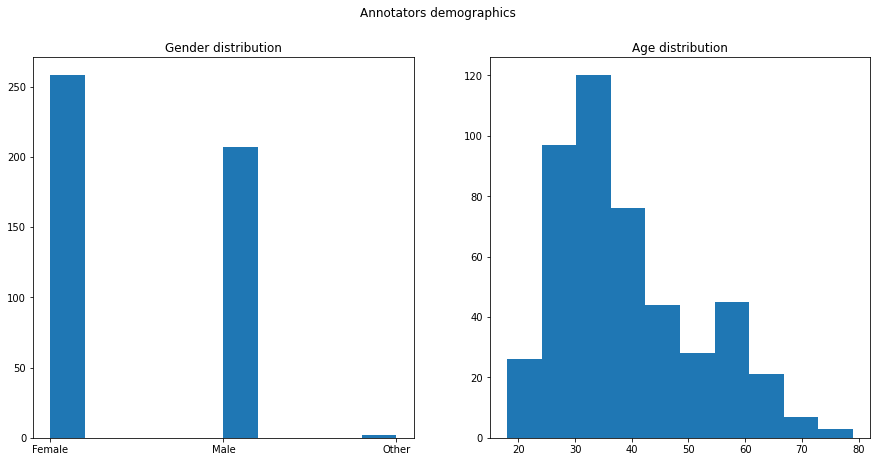

In [28]:
fig, (ax1 ,ax2) = plt.subplots(1,2)
demographics.Gender.hist(ax=ax1, grid=False).set_title("Gender distribution");
demographics.Age.hist(ax=ax2, grid=False).set_title("Age distribution");
fig.suptitle("Annotators demographics");

In [29]:
demographics.Gender.value_counts()

Female    258
Male      207
Other       2
Name: Gender, dtype: int64

In [30]:
demographics.Age.median()

36.0

In [33]:
df = pd.merge(emojis, demographics, on='WorkerID')
df.corr()

,FormId,Duration,emoji_index,Age
FormId,1.000000,0.169366,0.005681,-0.012098
Duration,0.169366,1.000000,-0.006421,0.024742
emoji_index,0.005681,-0.006421,1.000000,0.007682
Age,-0.012098,0.024742,0.007682,1.000000
